# BERTopic

In [1]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

from bertopic import BERTopic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load data
df = pd.read_json('/content/translated_results_en 2.json')
df.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [4]:
# define functions

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    cleaned = re.sub(r'[äÄ]', 'ä', cleaned)
    cleaned = re.sub(r'[öÖ]', 'ö', cleaned)
    cleaned = re.sub(r'[üÜ]', 'ü', cleaned)
    cleaned = cleaned.strip()
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-zA-ZäöüÄÖÜß]+', ' ', word, flags=re.UNICODE)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence, stopwords):
    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
    return re_stop_words.sub(" ", sentence)

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

# define stopwords
stop_words = set(stopwords.words(['english']))

# define stemmer
stemmer = SnowballStemmer('english')

df['website_text_in_en'] = df['website_text_in_en'].astype(str)

# apply functions
df['website_text_in_en'] = df['website_text_in_en'].str.lower()
df['website_text_in_en'] = df['website_text_in_en'].apply(cleanPunc)
df['website_text_in_en'] = df['website_text_in_en'].apply(keepAlpha)
df['website_text_in_en'] = df['website_text_in_en'].apply(removeStopWords, stopwords=stopwords)
df['website_text_in_en'] = df['website_text_in_en'].apply(stemming)

In [5]:
df

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel telephon advic switzerland arrang call...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,kunveno work happier work happier boost cultur...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,scopaswer work someth new check here
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,studymaniac studi success open main menu partn...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,aicon artifici intellig cloud one advanc analy...
...,...,...,...,...,...,...
3284,Coleap,4994,https://coleap.com/,Coleap Transform your content into incomeTurn ...,en,coleap transform content incometurn content in...
3285,Trade Machines FI,4995,http://trademachines.com,▷ All used industrial equipment online on Trad...,en,use industri equip onlin trademachinesenglishu...
3286,Yasoon,4996,http://yasoon.com/,Home - yasoon Patrick Partner Manager Get in t...,en,home yasoon patrick partner manag get touch mi...
3287,Phoneboost,4997,https://www.phoneboost.de/,Phoneboost – Boost up your phone! AKKU LEER?PH...,de,phoneboost boost phone batteri emptyphoneboost...


In [6]:
#df = df.drop(['Content', 'original_language'], axis=1)
#df

In [61]:
topic_model = BERTopic(min_topic_size=30, verbose=True)
topics, probs = topic_model.fit_transform(df['website_text_in_en'])

Batches:   0%|          | 0/95 [00:00<?, ?it/s]

2023-07-07 12:39:36,313 - BERTopic - Transformed documents to Embeddings
2023-07-07 12:39:52,606 - BERTopic - Reduced dimensionality
2023-07-07 12:39:52,731 - BERTopic - Clustered reduced embeddings


After generating topics and their probabilities, we can access the frequent topics that were generated:

In [62]:
topic_info_df = topic_model.get_topic_info()
topic_info_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1480,-1_custom_data_use_time,"[custom, data, use, time, product, us, servic,...",[contori content factori social sell emot arti...
1,0,278,0_patient_care_health_medic,"[patient, care, health, medic, clinic, doctor,...",[care servic care advic pflegix look help offe...
2,1,273,1_data_cloud_manag_solut,"[data, cloud, manag, solut, servic, process, u...",[uniki uniki elli revolution collabor larg fil...
3,2,165,2_price_food_organ_sprout,"[price, food, organ, sprout, vegan, product, t...",[region organ dietari supplement without addit...
4,3,156,3_invest_bank_financ_payment,"[invest, bank, financ, payment, financi, asset...",[pronobl ag us sme financi start sme financ st...
5,4,124,4_job_employe_compani_hr,"[job, employe, compani, hr, talent, applic, wo...",[effect train develop process ls leadership su...
6,5,77,5_eur_price_light_shop,"[eur, price, light, shop, product, design, fas...",[shirt print shirt print design spreadshirt co...
7,6,70,6_energi_system_solar_electr,"[energi, system, solar, electr, batteri, charg...",[tenant electr altern solar small multi famili...
8,7,70,7_car_bike_vehicl_leas,"[car, bike, vehicl, leas, rental, drive, gmbh,...",[finn car subscript round carefre drivingchoos...
9,8,64,8_hotel_holiday_travel_home,"[hotel, holiday, travel, home, landlord, apart...",[rent cheap holiday apart holiday hous hometog...


In [60]:
topic_model.topic_labels()

AttributeError: ignored

In [58]:
new_topics = topic_model.reduce_outliers(df['website_text_in_en'], topics)

KeyError: ignored

In [36]:
topics = topic_model.get_topics()
topics

{-1: [('custom', 0.010346041062463349),
  ('data', 0.00950751561867144),
  ('use', 0.008735645696376217),
  ('product', 0.008705931455050575),
  ('time', 0.008294837026097302),
  ('manag', 0.008140914774577662),
  ('servic', 0.008091315250913963),
  ('us', 0.007902049302814924),
  ('compani', 0.00771398055450303),
  ('solut', 0.007679695804512428)],
 0: [('patient', 0.027585553167093133),
  ('medic', 0.019785544947314753),
  ('health', 0.019155374238269796),
  ('care', 0.01877214593538121),
  ('doctor', 0.013527984760753849),
  ('clinic', 0.013155071217601864),
  ('therapi', 0.012702334034291973),
  ('treatment', 0.011708346878879543),
  ('practic', 0.010277327526590201),
  ('medicin', 0.009341138724866591)],
 1: [('job', 0.0366210505539533),
  ('employe', 0.024586190984827432),
  ('hr', 0.020202384185615752),
  ('talent', 0.01931452172040595),
  ('recruit', 0.01709436079845851),
  ('candid', 0.016844660770156873),
  ('applic', 0.01643733080617504),
  ('compani', 0.015489517115373445),

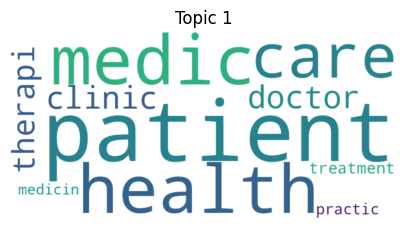

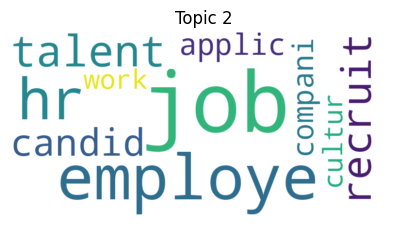

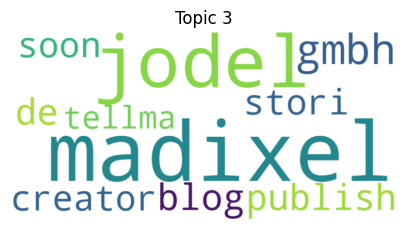

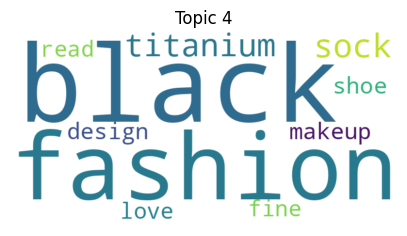

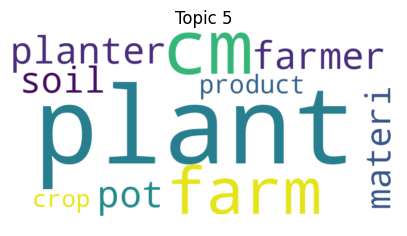

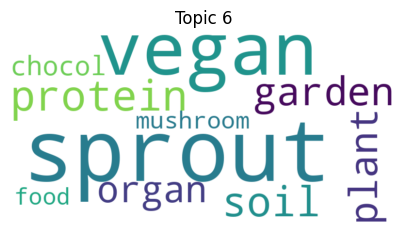

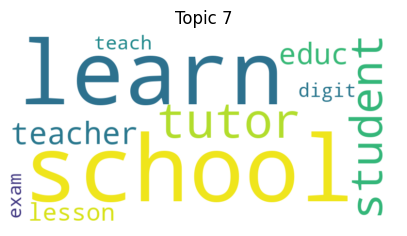

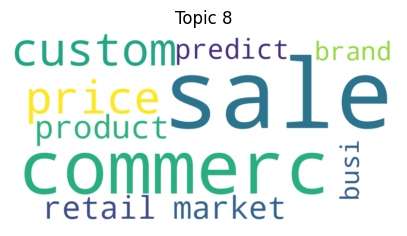

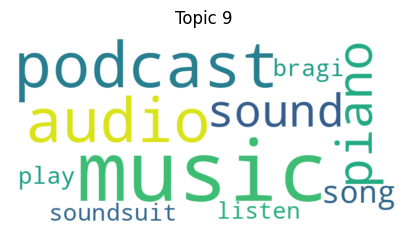

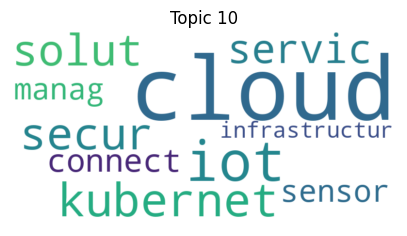

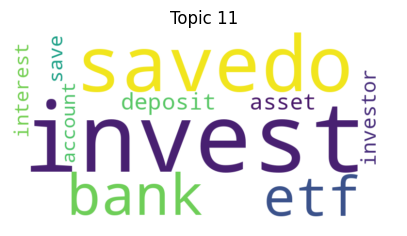

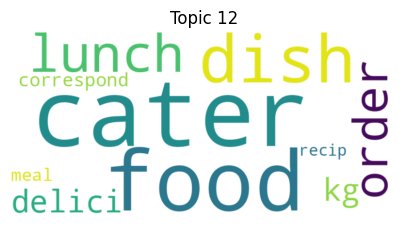

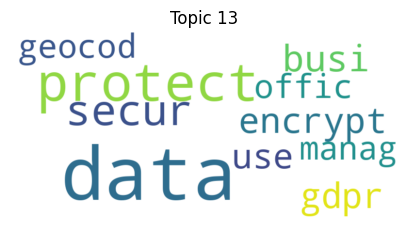

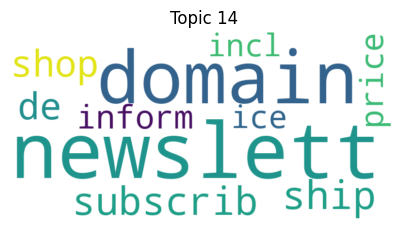

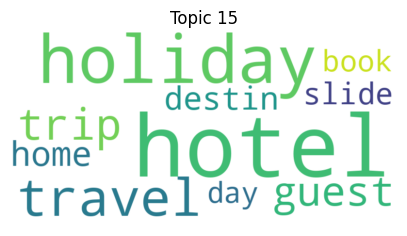

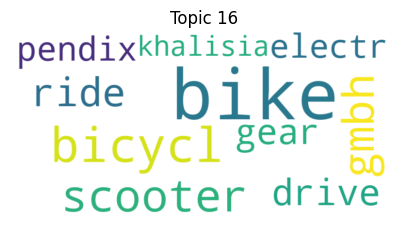

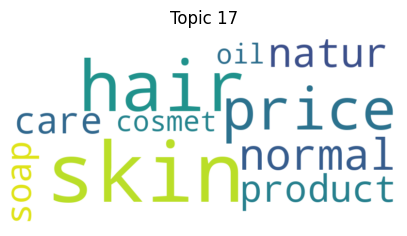

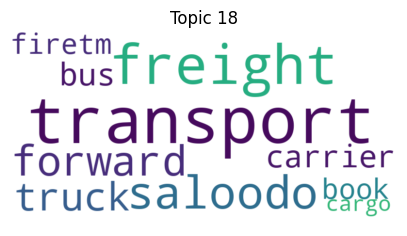

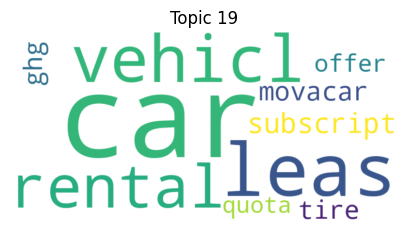

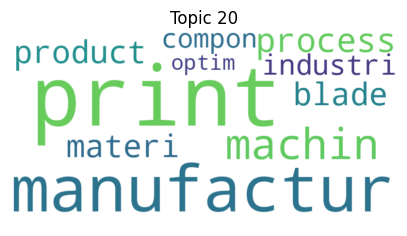

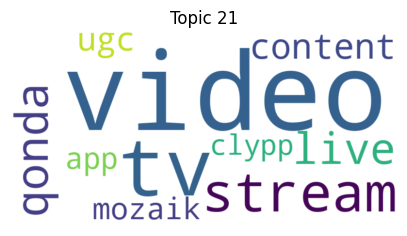

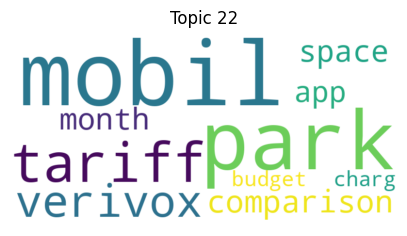

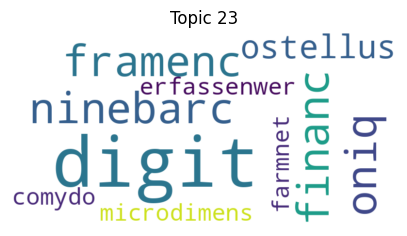

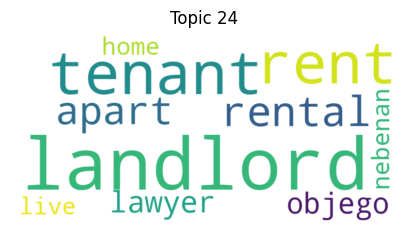

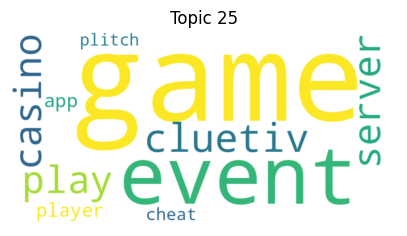

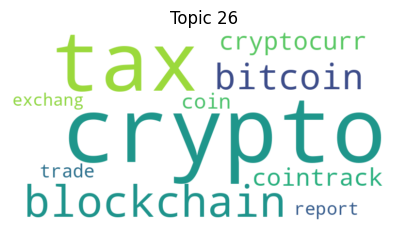

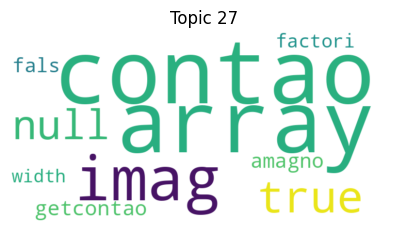

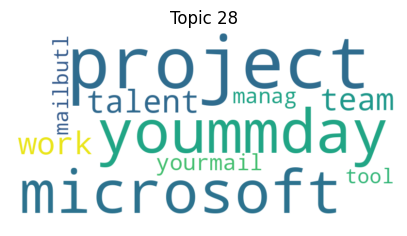

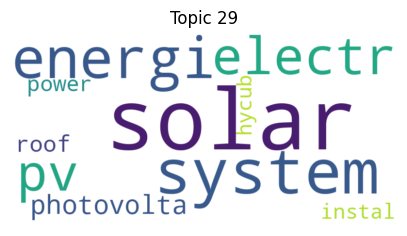

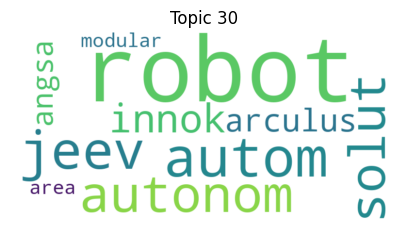

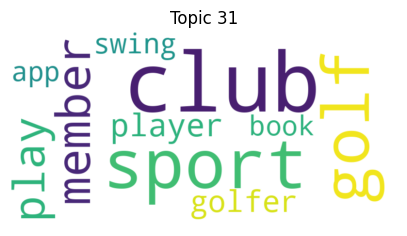

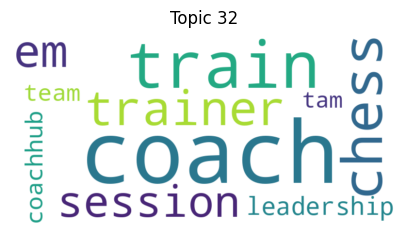

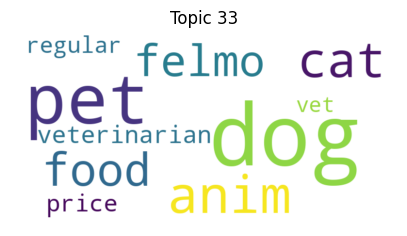

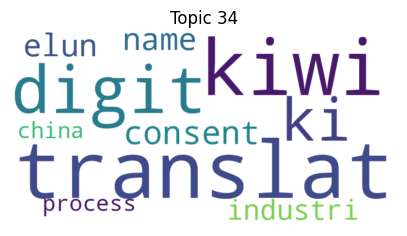

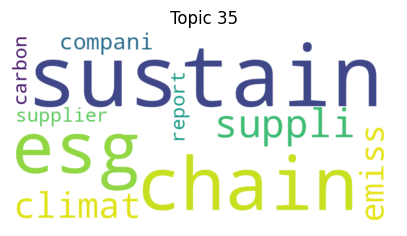

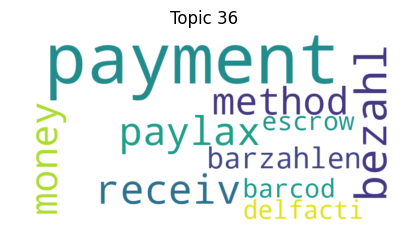

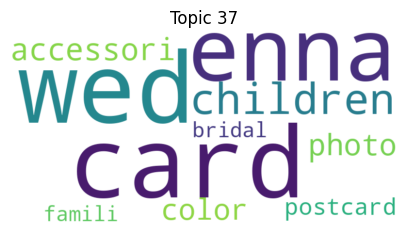

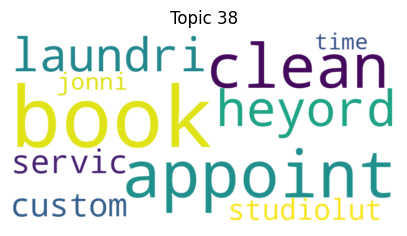

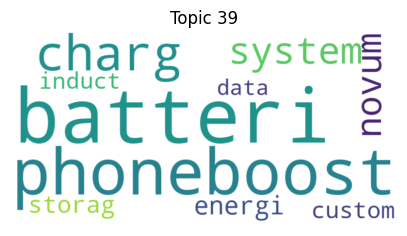

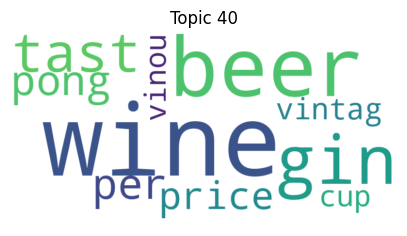

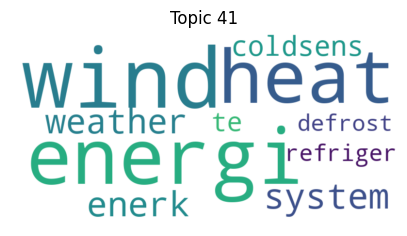

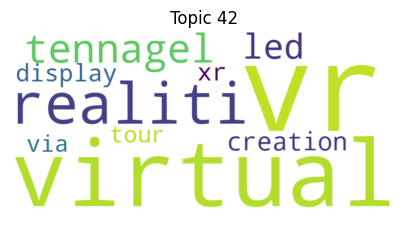

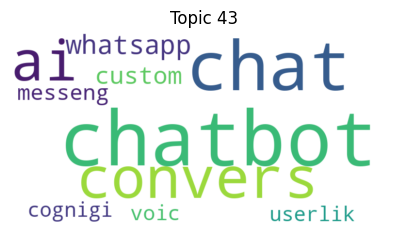

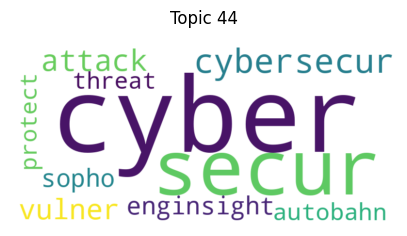

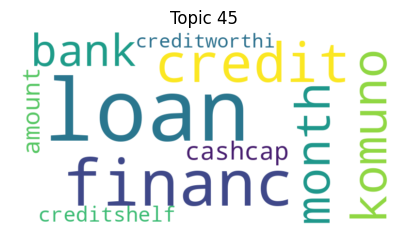

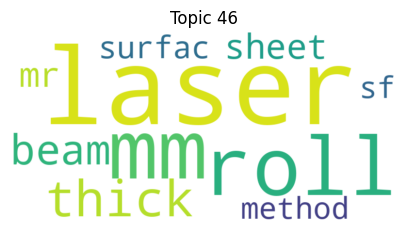

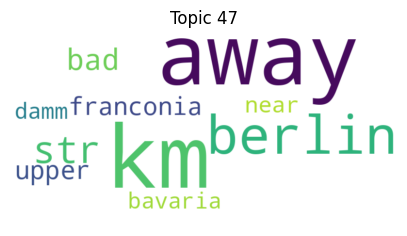

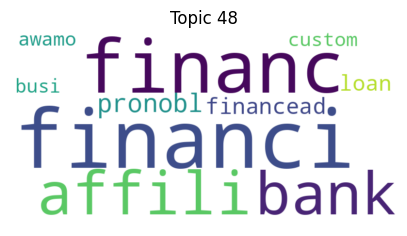

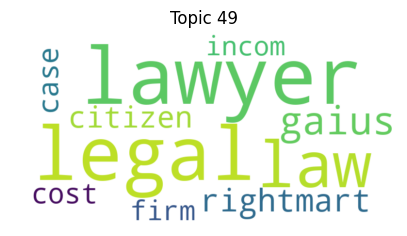

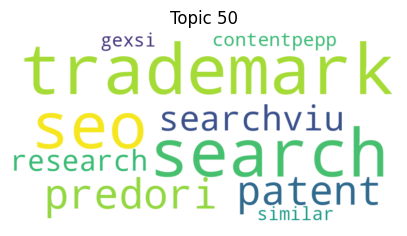

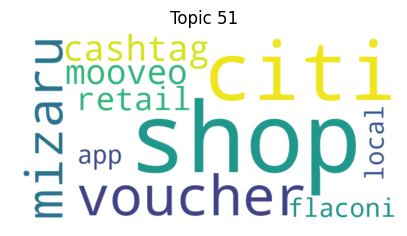

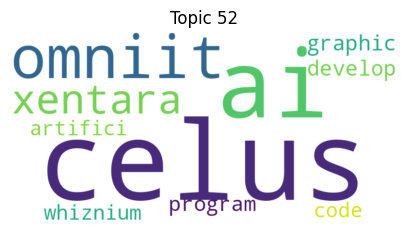

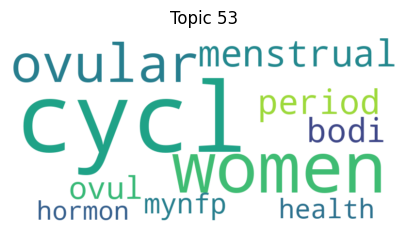

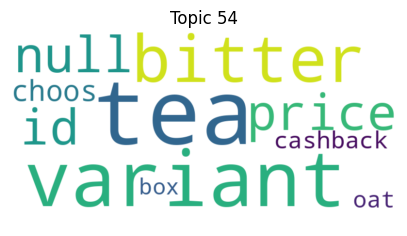

In [41]:
for topic_id in range(len(topics) -1):
    topic_words = dict(topics[topic_id])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id +1}')
    plt.show()


In [32]:
# Print texts for each cluster
for cluster in range(len(topic_info_df)):
    cluster_texts = df.loc[topic_info_df['Topic'] == cluster, 'Representative_Docs']
    print(f"---------------------------------------------Cluster {cluster}:---------------------------------------------")
    for text in cluster_texts:
        print(text)
        print()


    # Plot relevant words of the cluster
    cluster_text = ' '.join(cluster_texts)
    wordcloud = WordCloud().generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()

KeyError: ignored

In [8]:
topic_model.topic_representations_

{-1: [('data', 0.01638779222173696),
  ('custom', 0.0162044671075262),
  ('use', 0.014734350619447471),
  ('product', 0.014038953963163332),
  ('time', 0.013838475179545248),
  ('manag', 0.01247579558523378),
  ('servic', 0.01247366069498529),
  ('us', 0.012425978938804934),
  ('compani', 0.011975380973456731),
  ('solut', 0.0115370744625851)],
 0: [('patient', 0.03702462729617209),
  ('care', 0.026848188790064342),
  ('health', 0.0263130054107257),
  ('medic', 0.025935886494392647),
  ('clinic', 0.01772585403299915),
  ('doctor', 0.017281542576991032),
  ('therapi', 0.015993960308890987),
  ('treatment', 0.014976694068384314),
  ('practic', 0.014023171913536369),
  ('time', 0.013791870008327628)],
 1: [('data', 0.03773525746903321),
  ('cloud', 0.030022310677730746),
  ('manag', 0.023218081011919516),
  ('process', 0.021307317159584165),
  ('servic', 0.020711025399422597),
  ('solut', 0.020710994148974912),
  ('use', 0.019868575553053887),
  ('softwar', 0.018741260947321085),
  ('busi

-1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated, topic 0:

In [9]:
topic_model.get_topic(-1)

[('data', 0.01638779222173696),
 ('custom', 0.0162044671075262),
 ('use', 0.014734350619447471),
 ('product', 0.014038953963163332),
 ('time', 0.013838475179545248),
 ('manag', 0.01247579558523378),
 ('servic', 0.01247366069498529),
 ('us', 0.012425978938804934),
 ('compani', 0.011975380973456731),
 ('solut', 0.0115370744625851)]

In [10]:
topic_model.get_topic(0)

[('patient', 0.03702462729617209),
 ('care', 0.026848188790064342),
 ('health', 0.0263130054107257),
 ('medic', 0.025935886494392647),
 ('clinic', 0.01772585403299915),
 ('doctor', 0.017281542576991032),
 ('therapi', 0.015993960308890987),
 ('treatment', 0.014976694068384314),
 ('practic', 0.014023171913536369),
 ('time', 0.013791870008327628)]

In [11]:
topic_model.get_topic(17)

False

We can visualize the topics in a distance map:

In [12]:
topic_model.visualize_topics()

In [13]:
topic_model.visualize_heatmap()

In [14]:
topic_model.visualize_distribution(probs)

In [15]:
hierarchical_topics = topic_model.hierarchical_topics(df['website_text_in_en'])

100%|██████████| 15/15 [00:00<00:00, 114.03it/s]


In [16]:
from scipy.cluster import hierarchy as sch

# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(df['website_text_in_en'], linkage_function=linkage_function)

100%|██████████| 15/15 [00:00<00:00, 107.54it/s]


In [17]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [18]:
topic_model.visualize_barchart()

In [19]:
topic_model.visualize_term_rank()

Using `get_document_info`, we can also extract information on a document level, such as their corresponding topics, probabilities, whether they are representative documents for a topic, etc.:

In [20]:
topic_model.get_document_info(df['website_text_in_en'])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,itravel telephon advic switzerland arrang call...,-1,-1_data_custom_use_product,"[data, custom, use, product, time, manag, serv...",[atl badg manag author manag badg manag author...,data - custom - use - product - time - manag -...,0.000000,False
1,kunveno work happier work happier boost cultur...,4,4_job_employe_compani_hr,"[job, employe, compani, hr, talent, applic, wo...",[effect train develop process ls leadership su...,job - employe - compani - hr - talent - applic...,0.651739,False
2,scopaswer work someth new check here,8,8_contact_de_blog_onlin,"[contact, de, blog, onlin, stori, servic, info...",[notor yes question search categori inform lov...,contact - de - blog - onlin - stori - servic -...,1.000000,False
3,studymaniac studi success open main menu partn...,10,10_learn_school_tutor_student,"[learn, school, tutor, student, teacher, educ,...",[simpleclub learn app school train less stress...,learn - school - tutor - student - teacher - e...,1.000000,False
4,aicon artifici intellig cloud one advanc analy...,-1,-1_data_custom_use_product,"[data, custom, use, product, time, manag, serv...",[atl badg manag author manag badg manag author...,data - custom - use - product - time - manag -...,0.000000,False
...,...,...,...,...,...,...,...,...
3016,coleap transform content incometurn content in...,-1,-1_data_custom_use_product,"[data, custom, use, product, time, manag, serv...",[atl badg manag author manag badg manag author...,data - custom - use - product - time - manag -...,0.000000,False
3017,use industri equip onlin trademachinesenglishu...,-1,-1_data_custom_use_product,"[data, custom, use, product, time, manag, serv...",[atl badg manag author manag badg manag author...,data - custom - use - product - time - manag -...,0.000000,False
3018,home yasoon patrick partner manag get touch mi...,-1,-1_data_custom_use_product,"[data, custom, use, product, time, manag, serv...",[atl badg manag author manag badg manag author...,data - custom - use - product - time - manag -...,0.000000,False
3019,phoneboost boost phone batteri emptyphoneboost...,5,5_energi_system_solar_batteri,"[energi, system, solar, batteri, electr, charg...",[tenant electr altern solar small multi famili...,energi - system - solar - batteri - electr - c...,0.895347,False


In [21]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean',
                        cluster_selection_method='eom', prediction_data=True)
topic_model_hdbscan = BERTopic(hdbscan_model=hdbscan_model)

In [ ]:
topic_model_hdbscan.fit_transform(df['website_text_in_en'])

In [23]:
topic_model_hdbscan.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1513,-1_custom_data_product_use,"[custom, data, product, use, time, servic, pro...",[qumundo connect financi market particip toggl...
1,0,267,0_patient_medic_care_health,"[patient, medic, care, health, clinic, doctor,...",[temedica personalis health need real insight ...
2,1,76,1_energi_system_solar_batteri,"[energi, system, solar, batteri, electr, charg...",[tenant electr altern solar small multi famili...
3,2,70,2_hotel_holiday_travel_rent,"[hotel, holiday, travel, rent, trip, landlord,...",[rent cheap holiday apart holiday hous hometog...
4,3,66,3_eur_light_shop_design,"[eur, light, shop, design, fashion, price, bla...",[snock com sock boxer short snock men back men...
5,4,64,4_invest_bank_savedo_etf,"[invest, bank, savedo, etf, asset, deposit, sa...",[digit asset manag bevestorpleas turn smartpho...
6,5,56,5_data_secur_protect_busi,"[data, secur, protect, busi, use, compani, man...",[one data highlight whitepap handbook data pro...
7,6,49,6_video_vr_virtual_content,"[video, vr, virtual, content, tv, stream, tenn...",[home xr easi meet yourrealityload exist virtu...
8,7,48,7_sale_custom_commerc_product,"[sale, custom, commerc, product, price, market...",[human experi platform e commerc compani selec...
9,8,47,8_cloud_iot_servic_solut,"[cloud, iot, servic, solut, connect, secur, ku...",[watchtow cloud solut medium size compani wtg ...
